# 📝 Exercise M7.01

This notebook aims at building baseline classifiers, which we'll use to
compare our predictive model. Besides, we will check the differences with
the baselines that we saw in regression.

We will use the adult census dataset, using only the numerical features.

In [4]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
sample as a testing at each round.

In [1]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression.

In [2]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), LogisticRegression())

Get the test score by using the model, the data, and the cross-validation
strategy that you defined above.

In [5]:
# Write your code here.
from sklearn.model_selection import cross_validate

result_classifier = cross_validate(classifier, data, target, cv=cv, n_jobs=2)

test_score_classifier = pd.Series(
    result_classifier["test_score"], name="Classifier score")

Using the `sklearn.model_selection.permutation_test_score` function,
check the chance level of the previous model.

In [6]:
# Write your code here.
from sklearn.model_selection import permutation_test_score

score, permutation_score, pvalue = permutation_test_score(
    classifier, data, target, cv=cv, n_jobs=2, n_permutations=10)
test_score_permutation = pd.Series(permutation_score, name="Permuted score")

Finally, compute the test score of a dummy classifier which would predict
the most frequent class from the training set. You can look at the
`sklearn.dummy.DummyClassifier` class.

In [7]:
# Write your code here.
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
result_dummy = cross_validate(dummy, data, target, cv=cv, n_jobs=2)
test_score_dummy = pd.Series(result_dummy["test_score"], name="Dummy score")

Now that we collected the results from the baselines and the model, plot
the distributions of the different test scores.

We concatenate the different test score in the same pandas dataframe.

In [8]:
# Write your code here.
final_test_scores = pd.concat(
    [test_score_classifier, test_score_permutation, test_score_dummy],
    axis=1,
)

Next, plot the distributions of the test scores.

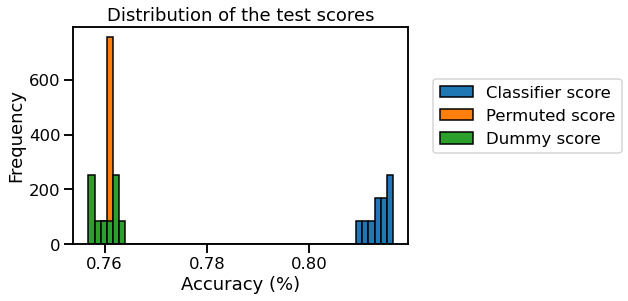

In [9]:
# Write your code here.
import matplotlib.pyplot as plt

final_test_scores.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the test scores")

Change the strategy of the dummy classifier to `stratified`, compute the
results and plot the distribution together with the other results. Explain
why the results get worse.

In [10]:
# Write your code here.
dummy = DummyClassifier(strategy="stratified")
result_dummy_stratify = cross_validate(dummy, data, target, cv=cv, n_jobs=2)
test_score_dummy_stratify = pd.Series(
    result_dummy_stratify["test_score"], name="Dummy 'stratify' score")